# LAB 8

#### GREY HARRIS
#### 97774899

# Imports

In [0]:
import numpy as np
import numba
from numba import jit
from numba import cuda
from matplotlib import pyplot as plt 

# Question 1

## a

In [0]:
def extract_bita(n, i):
  return n >> i & 1 == 1

def check_circuita(start, end):
  v = np.ones(32, dtype=np.int32)
  count = 0
  for bits in range(start, end):
    for i in range(32):
      v[i] = extract_bita(bits, i)

    if (((v[0] or v[1]) and (not v[1] or not v[3]) and (v[2] or v[3])
       and (not v[3] or not v[4]) and (v[4] or not v[5])
       and (v[5] or not v[6]) and (v[5] or v[6])
       and (v[6] or not v[15]) and (v[7] or not v[8])
       and (not v[7] or not v[13]) and (v[8] or v[9])
       and (v[8] or not v[9]) and (not v[9] or not v[10])
       and (v[9] or v[11]) and (v[10] or v[11])
       and (v[12] or v[13]) and (v[13] or not v[14])
       and (v[14] or v[15]))
       and
          ( (v[16] or v[17]) and (not v[17] or not v[19]) and (v[18] or v[19])
       and (not v[19] or not v[20]) and (v[20] or not v[21])
       and (v[21] or not v[22]) and (v[21] or v[22])
       and (v[22] or not v[31]) and (v[23] or not v[24])
       and (not v[23] or not v[29]) and (v[24] or v[25])
       and (v[24] or not v[25]) and (not v[25] or not v[26])
       and (v[25] or v[27]) and (v[26] or v[27])
       and (v[28] or v[29]) and (v[29] or not v[30])
       and (v[30] or v[31]))):
      count += 1
  return count


In [0]:
%time print(check_circuita(0, 1048576))

#0
#CPU times: user 10 s, sys: 3.89 ms, total: 10 s
#Wall time: 10 s

0
CPU times: user 10.2 s, sys: 1.44 ms, total: 10.2 s
Wall time: 10.3 s


## b

In [0]:
@jit
def extract_bit(n, i):
  return n >> i & 1 == 1

@jit
def check_circuit(start, end):
  v = np.ones(32, dtype=np.int32)
  count = 0
  for bits in range(start, end):
    for i in range(32):
      v[i] = extract_bit(bits, i)

    if (((v[0] or v[1]) and (not v[1] or not v[3]) and (v[2] or v[3])
       and (not v[3] or not v[4]) and (v[4] or not v[5])
       and (v[5] or not v[6]) and (v[5] or v[6])
       and (v[6] or not v[15]) and (v[7] or not v[8])
       and (not v[7] or not v[13]) and (v[8] or v[9])
       and (v[8] or not v[9]) and (not v[9] or not v[10])
       and (v[9] or v[11]) and (v[10] or v[11])
       and (v[12] or v[13]) and (v[13] or not v[14])
       and (v[14] or v[15]))
       and
          ( (v[16] or v[17]) and (not v[17] or not v[19]) and (v[18] or v[19])
       and (not v[19] or not v[20]) and (v[20] or not v[21])
       and (v[21] or not v[22]) and (v[21] or v[22])
       and (v[22] or not v[31]) and (v[23] or not v[24])
       and (not v[23] or not v[29]) and (v[24] or v[25])
       and (v[24] or not v[25]) and (not v[25] or not v[26])
       and (v[25] or v[27]) and (v[26] or v[27])
       and (v[28] or v[29]) and (v[29] or not v[30])
       and (v[30] or v[31]))):
      count += 1
  return count


In [0]:
%time print(check_circuit(0, 1048576))

#0
#CPU times: user 736 ms, sys: 0 ns, total: 736 ms
#Wall time: 738 ms

0
CPU times: user 800 ms, sys: 17.9 ms, total: 818 ms
Wall time: 819 ms


## c

In [0]:
%time print(check_circuit(0, 4294967296))

#81
#CPU times: user 32.1 s, sys: 70.1 ms, total: 32.1 s
#Wall time: 32 s

81
CPU times: user 32.6 s, sys: 107 ms, total: 32.7 s
Wall time: 32.6 s


# Question 2

## a

In [0]:
@jit
def extract_bit(n, i):
  return n >> i & 1 == 1

@cuda.jit
def check_circuit_gpu(start, end, count_out):
  id = cuda.grid(1)
  per = (end - start) // cuda.gridsize(1)
  thread_start = id * per
  thread_end = (id+1) * per
  v = cuda.local.array(32, dtype=numba.int32)
  #v = np.ones(32, dtype=np.int32)
  count = 0
  for bits in range(thread_start, thread_end):
    for i in range(32):
      v[i] = extract_bit(bits, i)

    if (((v[0] or v[1]) and (not v[1] or not v[3]) and (v[2] or v[3])
       and (not v[3] or not v[4]) and (v[4] or not v[5])
       and (v[5] or not v[6]) and (v[5] or v[6])
       and (v[6] or not v[15]) and (v[7] or not v[8])
       and (not v[7] or not v[13]) and (v[8] or v[9])
       and (v[8] or not v[9]) and (not v[9] or not v[10])
       and (v[9] or v[11]) and (v[10] or v[11])
       and (v[12] or v[13]) and (v[13] or not v[14])
       and (v[14] or v[15]))
       and
          ( (v[16] or v[17]) and (not v[17] or not v[19]) and (v[18] or v[19])
       and (not v[19] or not v[20]) and (v[20] or not v[21])
       and (v[21] or not v[22]) and (v[21] or v[22])
       and (v[22] or not v[31]) and (v[23] or not v[24])
       and (not v[23] or not v[29]) and (v[24] or v[25])
       and (v[24] or not v[25]) and (not v[25] or not v[26])
       and (v[25] or v[27]) and (v[26] or v[27])
       and (v[28] or v[29]) and (v[29] or not v[30])
       and (v[30] or v[31]))):
      count += 1
  cuda.atomic.add(count_out, 0, count)
  #return count


## b

In [0]:
count_out = cuda.to_device(np.zeros(shape=1, dtype=np.int32))
check_circuit_gpu[128, 128](0, 4294967296, count_out)
%time print(count_out.copy_to_host(), 'solutions')

#[81] solutions
#CPU times: user 88.6 ms, sys: 70 ms, total: 159 ms
#Wall time: 159 ms

[81] solutions
CPU times: user 58.3 ms, sys: 42.4 ms, total: 101 ms
Wall time: 101 ms


## c

In [0]:
 def cuda_test(size):
  count_out = cuda.to_device(np.zeros(shape=1, dtype=np.int32))
  check_circuit_gpu[128, 128](0, 4294967296, count_out)
  %time print(count_out.copy_to_host(), 'solutions')

def print_results(blocks):
  for block in blocks:
    print("\nThreads:", block)
    cuda_test(block)

In [0]:
blocks = [128, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]
print_results(blocks)


Threads: 128
[81] solutions
CPU times: user 93.3 ms, sys: 59 ms, total: 152 ms
Wall time: 155 ms

Threads: 1024
[81] solutions
CPU times: user 85.1 ms, sys: 55 ms, total: 140 ms
Wall time: 141 ms

Threads: 2048
[81] solutions
CPU times: user 88.2 ms, sys: 42 ms, total: 130 ms
Wall time: 130 ms

Threads: 4096
[81] solutions
CPU times: user 70.1 ms, sys: 49 ms, total: 119 ms
Wall time: 121 ms

Threads: 8192
[81] solutions
CPU times: user 64.9 ms, sys: 45 ms, total: 110 ms
Wall time: 110 ms

Threads: 16384
[81] solutions
CPU times: user 66.1 ms, sys: 43.1 ms, total: 109 ms
Wall time: 109 ms

Threads: 32768
[81] solutions
CPU times: user 62.3 ms, sys: 45 ms, total: 107 ms
Wall time: 108 ms

Threads: 65536
[81] solutions
CPU times: user 67.9 ms, sys: 40 ms, total: 108 ms
Wall time: 108 ms

Threads: 131072
[81] solutions
CPU times: user 64.7 ms, sys: 43 ms, total: 108 ms
Wall time: 108 ms

Threads: 262144
[81] solutions
CPU times: user 58.5 ms, sys: 50 ms, total: 109 ms
Wall time: 108 ms

T

In [0]:
#y_axis = [128, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]
x_axis = [1,8,16,32,128,256,512,1024,2048,4096]
times = [96.6,92.5,75.7,82.6,67.8,61.4,61.3,66.7,62.6,56.9]

def plotter(x_axis, y_axis):
  plt.plot(x_axis, y_axis)
  plt.ylabel('Time in ms')
  plt.xlabel('Threads')
  plt.show()

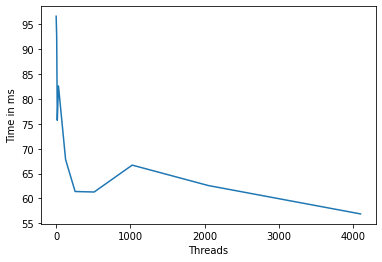

In [0]:
plotter(x_axis, times)

# Question 3

In [0]:
@jit
def median(a, b, c):
  if a > b:
    if b > c:
      return b 
    elif a > c: 
      return c 
    else:
      return a  
  else: 
    if a > c:
      return a
    elif b > c:
      return c
    else:
      return b 

@jit
def median_filter_seq(A):
  n = np.shape(A)[0]
  r = np.zeros(n, dtype=np.uint8)
  r[0] = A[0]
  r[n-1] = A[n-1]
  
  for i in range(1,n-1):
    r[i] = median(A[i-1], A[i], A[i+1])
  
  return r

A = np.random.randint(256, size=256, dtype=np.uint8)
B = np.array([1, 5, 3, 4, 2, 9, 4])

A_seq = median_filter_seq(A)
B_seq = median_filter_seq(B)

@cuda.jit
def median_filter(A):
  position = cuda.grid(1)
  if position < (A.size-1) and (position>0):
    A[position] = median(A[position - 1], A[position], A[position + 1])

median_filter[1,256](A)
median_filter[1,7](B)

assert np.array_equal(B, B_seq)
assert np.array_equal(A, A_seq)

In [0]:
# RUN IN FULL
# THEN RUNTIME - RESTART RUNTIME - RERUN BOX AGAIN - THEN REST SHOULD WORK
!pip install numba
!pip install cudatoolkit
!pip install cudf-cuda100
!cp /usr/local/lib/python3.6/dist-packages/librmm.so .
# installing cuml dependencies
!apt install libopenblas-base libomp-dev 
# installing the cuml 
!pip install cuml-cuda100
!cp /usr/local/lib/python3.6/dist-packages/libcuml.so /usr/lib64-nvidia/

ERROR: Could not find a version that satisfies the requirement cudatoolkit (from versions: none)
ERROR: No matching distribution found for cudatoolkit
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libomp-dev is already the newest version (5.0.1-1).
libopenblas-base is already the newest version (0.2.20+ds-4).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [0]:
import os
os.environ['NUMBAPRO_NVVM']='/usr/local/cuda-10.0/nvvm/lib64/libnvvm.so'  
os.environ['NUMBAPRO_LIBDEVICE']='/usr/local/cuda-10.0/nvvm/libdevice'


In [0]:
import cudf
!wget 'https://github.com/plotly/datasets/raw/master/nz_weather.csv'

--2020-05-28 10:42:39--  https://github.com/plotly/datasets/raw/master/nz_weather.csv
Resolving github.com (github.com)... 13.250.177.223
Connecting to github.com (github.com)|13.250.177.223|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/plotly/datasets/master/nz_weather.csv [following]
--2020-05-28 10:42:39--  https://raw.githubusercontent.com/plotly/datasets/master/nz_weather.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5206 (5.1K) [text/plain]
Saving to: ‘nz_weather.csv’

nz_weather.csv      100%[===================>]   5.08K  --.-KB/s    in 0s      

2020-05-28 10:42:40 (70.1 MB/s) - ‘nz_weather.csv’ saved [5206/5206]



In [0]:
import numpy as np
weather = cudf.read_csv('nz_weather.csv') #read the csv file to a dataframe


In [0]:
ak = weather['Auckland']
chch = weather['Christchurch']
akchch = weather[ak > chch]

OutDate = akchch.groupby(akchch['DATE']).count()

OutDate = OutDate.rename(columns={"DATE": "Year"})

In [0]:
print(OutDate.loc[:,['Year']])

    Year
2000     6
2001    12
2002     8
2003    12
2004     9
2005     9
2006    10
2007    11
2008    11
2009    10
[3 more rows]


# Question 5

In [0]:
!wget "https://github.com/plotly/datasets/raw/master/auto-mpg.csv"
import cuml
import numpy as np

--2020-05-28 11:15:50--  https://github.com/plotly/datasets/raw/master/auto-mpg.csv
Resolving github.com (github.com)... 13.229.188.59
Connecting to github.com (github.com)|13.229.188.59|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv [following]
--2020-05-28 11:15:50--  https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10118 (9.9K) [text/plain]
Saving to: ‘auto-mpg.csv’

auto-mpg.csv        100%[===================>]   9.88K  --.-KB/s    in 0s      

2020-05-28 11:15:50 (91.3 MB/s) - ‘auto-mpg.csv’ saved [10118/10118]



In [0]:
cum = cuml.LinearRegression()
df = cudf.read_csv('auto-mpg.csv')
print(df)
df['weight_f'] = df['weight'].astype(dtype = np.float64)
df['cylinders_f'] = df['cylinders'].astype(dtype = np.float64)
tds = cum.fit(df[['cylinders_f','weight_f']], df['mpg'])
end = tds.predict(cudf.DataFrame([('cylinders_f',[6.,4.]), ('weight_f',[3200., 2000.])]))
print(str(end))

     mpg  cylinders  displacement  horsepower  weight  acceleration  model-year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70
5  15.0          8         429.0       198.0    4341          10.0          70
6  14.0          8         454.0       220.0    4354           9.0          70
7  14.0          8         440.0       215.0    4312           8.5          70
8  14.0          8         455.0       225.0    4425          10.0          70
9  15.0          8         390.0       190.0    3850           8.5          70
[388 more rows]
0    21.659452280710045
1    30.759169045121105
dtype: float64
